# NLP08- Seq2Seq : ÌïúÏòÅÎ≤àÏó≠Í∏∞ ÎßåÎì§Í∏∞
# Î™©Ï∞®

> LMS Îî∞ÎùºÌï¥Î≥¥Í∏∞ 

1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
2. Î™®Îç∏ ÏÑ§Í≥Ñ
3. ÌõàÎ†®ÌïòÍ∏∞ 
 * 1) Optimizer & Loss
 * 2) tran_step Íµ¨ÌòÑ
 * 3) ÌõàÎ†® ÏãúÏûë 




> ÌîÑÎ°úÏ†ùÌä∏: ÌïúÏòÅ Î≤àÏó≠Í∏∞ ÎßåÎì§Í∏∞

* Step 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
* Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú
* Step 3. Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî
* Step 4. Î™®Îç∏ ÏÑ§Í≥Ñ
* Step 5. ÌõàÎ†®ÌïòÍ∏∞



## ÌöåÍ≥†

# LMS Îî∞ÎùºÌï¥Î≥¥Í∏∞ 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

## 1.Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [2]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

print(tf.__version__)

2.9.2


* tf.keras.utils.get_file()¬†Ìï®Ïàò :ÌÖêÏÑúÌîåÎ°úÏö∞ÏóêÏÑú Ï†úÍ≥µÌïòÎäî Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Ìï®Ïàò
 * get_file()Ìï®Ïàò: URLÎ°úÎ∂ÄÌÑ∞ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïö¥Î∞õÍ≥†, ÏïïÏ∂ïÎêú ÌòïÏãùÏùº Í≤ΩÏö∞ Ìï¥Ï†ú 

In [3]:
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip',
    origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

Îã§Ïö¥Î°úÎìúÎ∞õÏùÄ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò® ÌõÑ, ÌòïÌÉúÎ•º ÌôïÏù∏

In [4]:
with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))
print('\n')
print("Example:")

for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 118964


Example:
>> Go.	Ve.
>> Wait.	Esperen.
>> Hug me.	Abr√°zame.
>> No way!	¬°Ni cagando!
>> Call me.	Llamame.


In [5]:
type(raw)

list

In [6]:
len(raw)

118964

In [7]:
raw[0:200][::20]

['Go.\tVe.',
 'Wait.\tEsperen.',
 'Hug me.\tAbr√°zame.',
 'No way!\t¬°Ni cagando!',
 'Call me.\tLlamame.',
 'Go away!\t¬°Salga de aqu√≠!',
 'Hang on.\tAgarra fuertemente.',
 'I moved.\tMe he trasladado.',
 'Perfect!\t¬°Perfecto!',
 'Wake up!\t¬°Despertate!']

In [8]:
raw[0:100][::20]

['Go.\tVe.',
 'Wait.\tEsperen.',
 'Hug me.\tAbr√°zame.',
 'No way!\t¬°Ni cagando!',
 'Call me.\tLlamame.']

In [9]:
raw[0:100:20]

['Go.\tVe.',
 'Wait.\tEsperen.',
 'Hug me.\tAbr√°zame.',
 'No way!\t¬°Ni cagando!',
 'Call me.\tLlamame.']

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ : Ï†ïÏ†úÌïòÍ∏∞


ÏÜåÏä§ Î¨∏Ïû•Í≥º ÌÉÄÍ≤ü Î¨∏Ïû•ÏùÑ Î∂ÑÎ¶¨: 

Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî \t¬†Í∏∞Ìò∏Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏòÅÏñ¥ÏôÄ Ïä§ÌéòÏù∏Ïñ¥Í∞Ä Î≥ëÎ†¨ ÏåçÏùÑ Ïù¥Î£®Í∏∞Ïóê
¬†\t¬†Í∏∞Ìò∏Î•º Îß§Í∞úÎ≥ÄÏàòÎ°ú¬†split()¬†Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ Î∂ÑÎ¶¨

Î¨∏Ïû•Ïùò ÏãúÏûë Î¨∏Ïûê¬†<start>, Ï¢ÖÎ£å Î¨∏Ïûê¬†<end>¬†:

DecoderÎäî Ï≤´ ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©Ìï† ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Î¨∏Ïû•ÏÉùÏÑ± Ï¢ÖÎ£åÎ•º ÏïåÎ¶¨Îäî ÎÅù ÌÜ†ÌÅ∞Ïù¥ Î∞òÎìúÏãú ÌïÑÏöî


* Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú Ìï®Ïàò Ï†ïÏùò

In [10]:
def preprocess_sentence(sentence, s_token=False, e_token=False):
    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)   #??
    sentence = re.sub(r'[" "]+', " ", sentence)         # Í≥µÎ∞± Ïó¨Îü¨Í∞ú Í≥µÎ∞±ÌïòÎÇòÎ°ú
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence) # ÎåÄÏÜåÎ¨∏Ïûê, Í∏∞Î≥∏ ÌäπÏàòÍ∏∞Ìò∏ Ïô∏Îäî Í≥µÎ∞±ÌïòÎÇòÎ°ú

    sentence = sentence.strip()

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence


In [11]:
enc_corpus = []
dec_corpus = []

num_examples = 30000

for pair in raw[:num_examples]:
    eng, spa = pair.split("\t")

    enc_corpus.append(preprocess_sentence(eng))
    dec_corpus.append(preprocess_sentence(spa, s_token=True, e_token=True))

print("English:", enc_corpus[100])   # go away !
print("Spanish:", dec_corpus[100])   # <start> salga de aqu ! <end>

English: go away !
Spanish: <start> salga de aqu ! <end>


### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ : ÌÜ†ÌÅ∞Ìôî

* tokenize() Ìï®Ïàò Ï†ïÏùò 

In [12]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

* ÌÜ†ÌÅ∞Ìôî: ÌÖêÏÑúÎ°ú Î≥ÄÌôò
* ÌõàÎ†®-Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨


In [13]:
# ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞
enc_tensor, enc_tokenizer = tokenize(enc_corpus)
dec_tensor, dec_tokenizer = tokenize(dec_corpus)

# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ÌïòÍ∏∞
enc_train, enc_val, dec_train, dec_val = \
train_test_split(enc_tensor, dec_tensor, test_size=0.2)

print("English Vocab Size:", len(enc_tokenizer.index_word))
print("Spanish Vocab Size:", len(dec_tokenizer.index_word))

English Vocab Size: 4931
Spanish Vocab Size: 8893


In [14]:
enc_tensor, enc_tokenizer

(array([[ 34,   1,   0, ...,   0,   0,   0],
        [ 34,   1,   0, ...,   0,   0,   0],
        [ 34,   1,   0, ...,   0,   0,   0],
        ...,
        [ 14,  36, 722, ...,   0,   0,   0],
        [ 14,  36, 367, ...,   0,   0,   0],
        [ 14,  36,  70, ...,   0,   0,   0]], dtype=int32),
 <keras.preprocessing.text.Tokenizer at 0x7f1f4b7f42d0>)

In [15]:
tokenize(enc_corpus)

(array([[ 34,   1,   0, ...,   0,   0,   0],
        [ 34,   1,   0, ...,   0,   0,   0],
        [ 34,   1,   0, ...,   0,   0,   0],
        ...,
        [ 14,  36, 722, ...,   0,   0,   0],
        [ 14,  36, 367, ...,   0,   0,   0],
        [ 14,  36,  70, ...,   0,   0,   0]], dtype=int32),
 <keras.preprocessing.text.Tokenizer at 0x7f1f4b1ff450>)

## 2.Î™®Îç∏ ÏÑ§Í≥Ñ : Seq2seq

 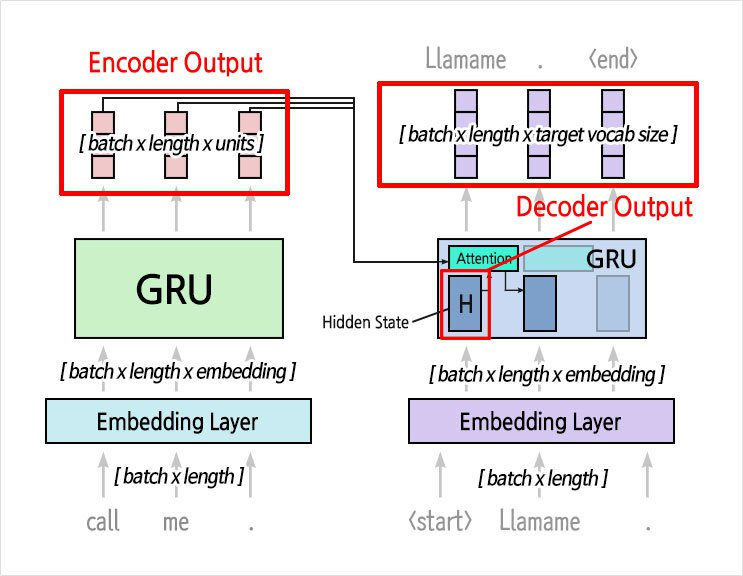

Í∞ÅÍ∞Å 1Í∞úÏùò GRUÏùÑ Í∞ñÎäî Encoder-Decoder Íµ¨Ï°∞

### Bahdanau Attention

In [16]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn


### Encoder

In [17]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

### Decoder

In [18]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

In [19]:
# ÏΩîÎìúÎ•º Ïã§ÌñâÌïòÏÑ∏Ïöî.

BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 1024
embedding_dim = 512

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)


# sample input
sequence_len = 30

sample_enc = tf.random.uniform((BATCH_SIZE, sequence_len))
sample_output = encoder(sample_enc)

print ('Encoder Output:', sample_output.shape)

sample_state = tf.random.uniform((BATCH_SIZE, units))

sample_logits, h_dec, attn = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                     sample_state, sample_output)

print ('Decoder Output:', sample_logits.shape)
print ('Decoder Hidden State:', h_dec.shape)
print ('Attention:', attn.shape)

Encoder Output: (64, 30, 1024)
Decoder Output: (64, 8894)
Decoder Hidden State: (64, 1024)
Attention: (64, 30, 1)


## 3.ÌõàÎ†®ÌïòÍ∏∞ 

### Optimizer & Loss

* Optimizer:  Î™®Îç∏Ïù¥ ÌïôÏäµÌï† ÎïåÏóê Ï†ïÎãµÏùÑ Ï∞æÏïÑÍ∞ÄÎäî Î∞©Î≤ï ( Ï£ºÎ°ú Adam ÏÇ¨Ïö©)
* Loss :  Encoder-Decoder Íµ¨Î°úÏù∏Ìï¥ ÏßÅÏ†ë Ïª§Ïä§ÌÖÄÌïòÏó¨ ÏÇ¨Ïö© 

In [20]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)


 ### train_step Íµ¨ÌòÑÌïòÍ∏∞

* train_step() Ï†ïÏùò : ÌïôÏäµÏóê ÌïÑÏöîÌïú Í≤ÉÏùÑ Î™®Îëê Í∞ÄÏ†∏Í∞Ä¬†LossÎ•º Í≥ÑÏÇ∞Ìïú ÌõÑ Î∞òÌôò

üí° @tf.function¬†Îç∞ÏΩîÎ†àÏù¥ÌÑ∞: 

 ÌõàÎ†® Ïô∏Ï†ÅÏù∏ ÌÖêÏÑúÌîåÎ°úÏö∞ Ïó∞ÏÇ∞ÏùÑ GPUÏóêÏÑú ÎèôÏûëÌïòÍ≤å Ìï¥ ÌõàÎ†®ÏùÑ Í∞ÄÏÜçÌï† Ïàò ÏûàÎèÑÎ°ù ÎèÑÏôÄÏ§ÄÎã§. (¬†@tf.function¬†Î•º Ï†úÍ±∞Ìï† Í≤ΩÏö∞, EpochÎãπ 1.5~2Î∞∞ Ïù¥ÏÉÅ Îçî ÎßéÏùÄ ÏãúÍ∞ÑÏù¥ ÏÜåÏöî)



üí° tf.GradientTape():

ÌïôÏäµÌïòÎ©∞ Î∞úÏÉùÌïú Î™®Îì† Ïó∞ÏÇ∞ÏùÑ Í∏∞Î°ùÌïòÎäî ÌÖåÏù¥ÌîÑÎ°ú Î™®Îç∏Ïù¥ Í∞Å Ïä§ÌÖùÏùò ÏµúÏ¢Ö Îã®Í≥ÑÏóêÏÑú ÎØ∏Î∂ÑÍ∞íÏùÑ Íµ¨ÌïòÎäî Îç∞Ïóê ÏÇ¨Ïö©

In [21]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss


### ÌõàÎ†® ÏãúÏûëÌïòÍ∏∞

üí° tqdm:

ÌõàÎ†®Ïùò ÏßÑÌñâ Í≥ºÏ†ïÏùÑ ÌïúÎààÏóê Î≥º Ïàò ÏûàÍ≤å Ìï¥Ï£ºÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨

In [22]:
from tqdm import tqdm    # tqdm
import random

EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm

Epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 375/375 [00:15<00:00, 24.33it/s, Loss 0.1425]


### Ïã§ÏäµÌïòÍ∏∞

Î∂ÑÎ¶¨Ìïú Validation SetÏùÑ ÏÇ¨Ïö©ÌïòÎäî¬†eval_step()¬†Ìï®ÏàòÎ•º Ï†ïÏùò

‚ö†Ô∏è  (Ï£ºÏùò! Evaluation Ï§ëÏóêÎäî Î™®Îç∏Ïù¥ ÌïôÏäµÏùÑ Ìï¥ÏÑúÎäî Ïïà Îê©ÎãàÎã§!)

In [23]:
# Define eval_step

@tf.function
def eval_step(src, tgt, encoder, decoder, dec_tok):
    bsz = src.shape[0]
    loss = 0

    enc_out = encoder(src)

    h_dec = enc_out[:, -1]

    dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

    for t in range(1, tgt.shape[1]):
        pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

        loss += loss_function(tgt[:, t], pred)
        dec_src = tf.expand_dims(tgt[:, t], 1)

    batch_loss = (loss / int(tgt.shape[1]))

    return batch_loss



In [24]:
# Training Process

from tqdm import tqdm

EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0

    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_train[idx:idx+BATCH_SIZE],
                                dec_train[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)

        total_loss += batch_loss

        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))

    test_loss = 0

    idx_list = list(range(0, enc_val.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (test_batch, idx) in enumerate(t):
        test_batch_loss = eval_step(enc_val[idx:idx+BATCH_SIZE],
                                    dec_val[idx:idx+BATCH_SIZE],
                                    encoder,
                                    decoder,
                                    dec_tokenizer)

        test_loss += test_batch_loss

        t.set_description_str('Test Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Test Loss %.4f' % (test_loss.numpy() / (test_batch + 1)))

Test Epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 94/94 [00:01<00:00, 49.29it/s, Test Loss 0.7576]


Î≤àÏó≠ ÏÑ±Îä•ÏùÑ ÌèâÍ∞Ä

In [25]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_train.shape[-1], enc_train.shape[-1]))
    
    sentence = preprocess_sentence(sentence)
    inputs = enc_tokenizer.texts_to_sequences([sentence.split()])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_train.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention



Attention MapÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÎäî Í≤ÉÎäî Î≥¥ÎÑàÏä§!

In [26]:
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


Input: can i have some coffee ?
Predicted translation: me dan un poco m s ? <end> 


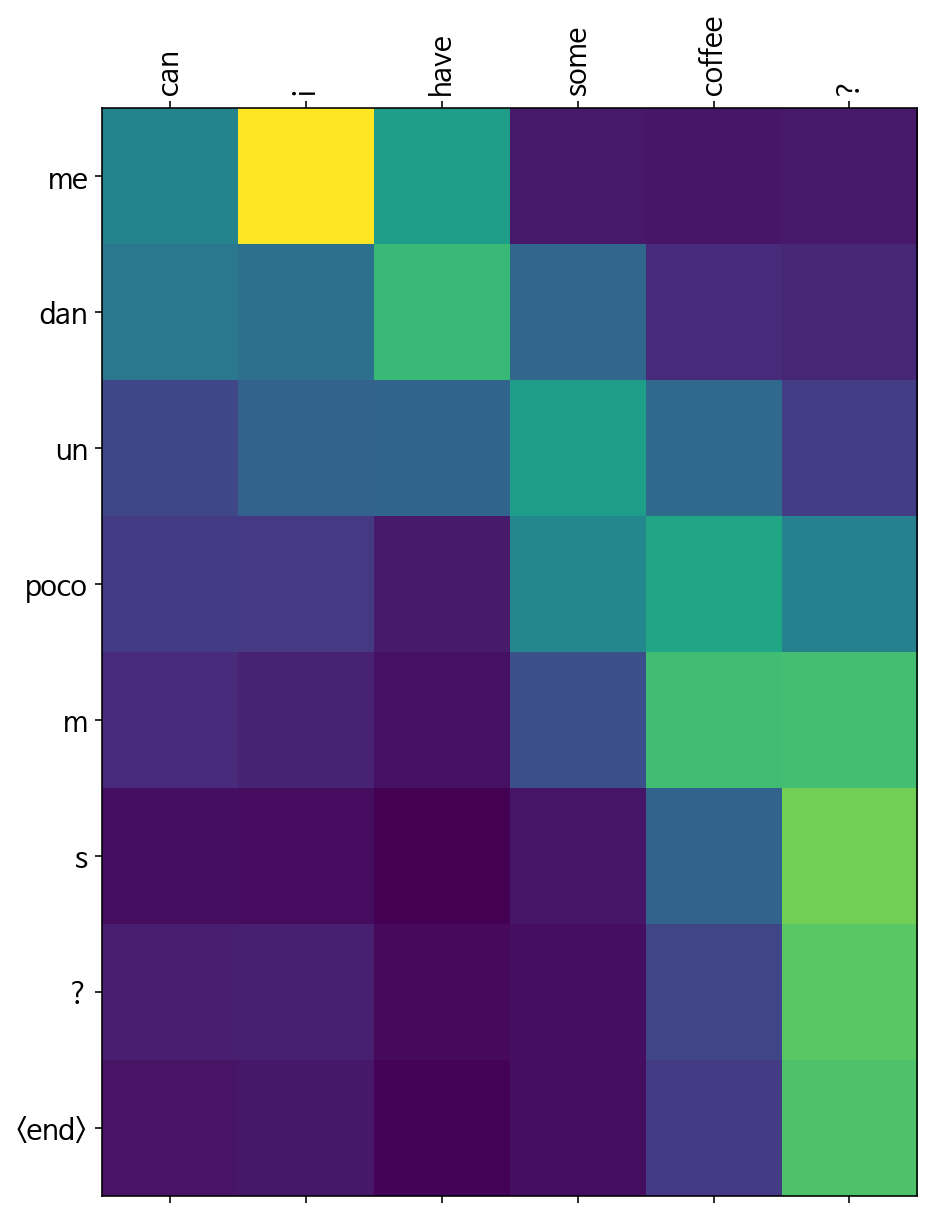

In [27]:
def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence.split())]
    plot_attention(attention, sentence.split(), result.split(' '))


translate("Can I have some coffee?", encoder, decoder)

# ÌîÑÎ°úÏ†ùÌä∏: ÌïúÏòÅ Î≤àÏó≠Í∏∞ ÎßåÎì§Í∏∞


‚ö†Ô∏è ÌïúÍ∏Ä Ìè∞Ìä∏ ÌëúÏãú

In [28]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontcon

In [29]:
import pandas
import tensorflow
import matplotlib

print(pandas.__version__)
print(tensorflow.__version__)
print(matplotlib.__version__)

1.3.5
2.9.2
3.2.2


In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io

print(tf.__version__)

2.9.2



## Step 1. Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú


In [32]:
path_to_zip = tf.keras.utils.get_file(
    'korean-english-park.train.tar.gz',
    origin='https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz',
    extract=True)

In [33]:
# path_to_zip = tf.keras.utils.get_file(
#     'korean-english-park.train.tar.gz',
#     origin='https://github.com/jungyeul/korean-parallel-corpora/blob/master/korean-english-news-v1/korean-english-park.train.tar.gz',
#     extract=True)


In [34]:
# path_to_zip = tf.keras.utils.get_file(
#     'korean-english-park.train.tar.gz',
#     origin='https://github.com/jungyeul/korean-parallel-corpora/blob/master/korean-english-news-v1/korean-english-park.train.tar.gz',
#     extract=True)


In [35]:
path_to_ko = os.path.dirname(path_to_zip)+"/korean-english-park.train.ko"
path_to_eng = os.path.dirname(path_to_zip)+"/korean-english-park.train.en"

In [36]:
with open(path_to_ko, "r") as f:
    raw_ko = f.read().splitlines()

print("Data Size:", len(raw_ko))
print('\n')
print("Example:")

for sen in raw_ko[0:100:20]: print(">>", sen)

Data Size: 94123


Example:
>> Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"
>> Î∂ÅÌïúÏùò ÌïµÎ¨¥Í∏∞ Í≥ÑÌöçÏùÑ Ìè¨Í∏∞ÌïòÎèÑÎ°ù ÌïòÎ†§Îäî ÏïïÎ†•Ïù¥ Í±∞ÏÑ∏ÏßÄÍ≥† ÏûàÎäî Í∞ÄÏö¥Îç∞, ÏùºÎ≥∏Í≥º Î∂ÅÌïúÏùò Ïô∏ÍµêÍ¥ÄÎì§Ïù¥ Ïô∏Íµê Í¥ÄÍ≥ÑÎ•º Ï†ïÏÉÅÌôîÌïòÎ†§Îäî ÌöåÎã¥ÏùÑ Ïû¨Í∞úÌñàÎã§.
>> "Í≤ΩÌò∏ Î°úÎ≥¥Ìä∏Í∞Ä Ïπ®ÏûÖÏûêÎÇò ÌôîÏû¨Î•º ÌÉêÏßÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Í∞úÏù∏Ï†ÅÏúºÎ°ú, Í∑∏Î¶¨Í≥† Ï†ÑÎ¨∏Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©ÎêòÍ≥† ÏûàÏäµÎãàÎã§."
>> ÏàòÏûêÏõêÎ∂Ä ÎãπÍµ≠ÏùÄ ÎÖºÎûÄÏù¥ ÎêòÍ≥† ÏûàÍ≥†, ÎßâÎåÄÌïú ÎπÑÏö©Ïù¥ ÎìúÎäî Ïù¥ ÏÇ¨ÏóÖÏóê ÎåÄÌï¥ ÎÇ¥ÎÖÑÏóê Í±¥ÏÑ§ÏùÑ ÏãúÏûëÌï† Í≥ÑÌöçÏù¥Îã§.
>> ÎòêÌïú Í∑ºÎ†• Ïö¥ÎèôÏùÄ ÌôúÎ∞úÌïòÍ≤å Í±∑Îäî Í≤ÉÏù¥ÎÇò ÏµúÏÜåÌïú 20Î∂Ñ ÎèôÏïà Îõ∞Îäî Í≤ÉÍ≥º Í∞ôÏùÄ Ïú†ÏÇ∞ÏÜå ÌôúÎèôÏóêÏÑú ÏñªÎäî Ïö¥Îèô Ìö®Í≥ºÎ•º Ïã¨Ïû•Í≥º ÌèêÏóê Ï£ºÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê, Ïó∞Íµ¨ÌïôÏûêÎì§ÏùÄ Í∑ºÎ†• Ïö¥ÎèôÏù¥ Ïã¨Ïû•Ïóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ Ïó¨Î∂ÄÏóê ÎåÄÌï¥ ÎÖºÏüÅÏùÑ Ìï¥ÏôîÎã§.


In [37]:
with open(path_to_eng, "r") as f:
    raw_eng = f.read().splitlines()

print("Data Size:", len(raw_eng))
print('\n')
print("Example:")

for sen in raw_eng[0:100:20]: print(">>", sen)

Data Size: 94123


Example:
>> Much of personal computing is about "can you top this?"
>> Amid mounting pressure on North Korea to abandon its nuclear weapons program Japanese and North Korean diplomats have resumed talks on normalizing diplomatic relations.
>> ‚ÄúGuard robots are used privately and professionally to detect intruders or fire,‚Äù Karlsson said.
>> Authorities from the Water Resources Ministry plan to begin construction next year on the controversial and hugely expensive project.
>> Researchers also have debated whether weight-training has a big impact on the heart, since it does not give the heart and lungs the kind of workout they get from aerobic activities such as brisk walking or running for at least 20 minutes.


## Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú


### 1)Ï§ëÎ≥µ Ï†úÍ±∞ 

In [38]:
#dataframeÏùò drop_duplicated ÌôúÏö©

pair_df = pd.DataFrame({'Korean':raw_ko, 'English':raw_eng})
pair_df

Korean  \
0                   Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"   
1      Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú Ìïò...   
2                             Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.   
3      79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂Ñ...   
4      Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú ÎèåÏïÑÍ∞î...   
...                                                  ...   
94118  ‚ÄúÏö∞Î¶¨Îäî 3Ïõî 8Ïùº ÍπÄÏäπÏó∞ ÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§Ïù¥ Î≥¥Î≥µÌè≠ÌñâÏóê Í∞ÄÎã¥Ìïú ÌòêÏùòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ ...   
94119   ÏõîÏöîÏùº Ïà†Ïßë Ï¢ÖÏóÖÏõê 6Î™ÖÏùÄ ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏóêÍ≤å Ìè≠ÌñâÏùÑ ÎãπÌñàÏùåÏùÑ ÏßÑÏà†ÌñàÎã§Í≥† Í≤ΩÏ∞∞ÏùÄ ÎßêÌñàÎã§.   
94120                       Í∑∏Îü¨ÎÇò Î∂àÏ∂©Î∂ÑÌïú Ï¶ùÍ±∞ ÌôïÎ≥¥Î°ú ÏàòÏÇ¨Ïóê Ïñ¥Î†§ÏõÄÏù¥ ÏûàÎã§.   
94121                  ÍπÄÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§ÏùÄ Î≥¥Î≥µÌè≠Ìñâ ÌòêÏùòÎ•º Í∞ïÎ†•Ìûà Î∂ÄÏù∏ÌïòÍ≥† ÏûàÎã§.   
94122  Í≤ΩÏ∞∞ÏùÄ ÍπÄÌöåÏû•Ïùò ÏßëÎ¨¥Ïã§ÏóêÏÑú Ï∂îÍ∞Ä Ï¶ùÍ±∞Î•º Ï∞æÏùÄ Ïù¥ÌõÑ Í∞ÄÎä•Ìïú Ìïú Ïò§Îäò ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏùÑ ...   

                                                 English  
0      Much of personal computing is about "can you t...  
1      so a mention a few weeks ago about a rechargea...  
2      Like all optical mice, But it also doesn't nee...  
3      uses gyroscopic sensors to control the cursor ...  
4      Intelligence officials have revealed a spate o...  
...                                                  ...  
94118  ‚Äù‚ÄùWe are hoping to seize material evidence to ...  
94119  ‚Äù On Monday, police secured statements from si...  
94120  But the lack of material evidence is making it...  
94121         Kim and his son both deny the allegations.  
94122  Police are planning to seek arrest warrants fo...  

[94123 rows x 2 columns]

In [39]:
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(pair_df)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 94123


In [40]:
pair_df[pair_df.duplicated()]

Korean  \
7789   Ïù¥Îì§ ÏùòÏõê Ï§ë 1Î™ÖÏùÄ Îπå ÌÅ¥Î¶∞ÌÑ¥ Ï†Ñ ÎåÄÌÜµÎ†πÏù¥ ÏßÄÎÇú Î™á Ï£ºÍ∞Ñ Î∂ÄÏù∏ ÌûêÎü¨Î¶¨ÏóêÍ≤å Ïò§Î∞îÎßàÏùò...   
9925                                              *ÌåêÎß§ Ï†úÌíà   
10070                                       * ÏïåÏïÑÎëêÎ©¥ Ï¢ãÏùÄ Í≤É:   
10074                                       * ÏïåÏïÑÎëêÎ©¥ Ï¢ãÏùÄ Í≤É:   
10079                                       * ÏïåÏïÑÎëêÎ©¥ Ï¢ãÏùÄ Í≤É:   
...                                                  ...   
93792                              ÌûêÎü¨Î¶¨ ÌÅ¥Î¶∞ÌÑ¥, Î∂ÅÌïú Î∞©Î¨∏Ìï†Íπå¬† ¬† ¬†   
93793                                Ïù¥ÎùºÌÅ¨ ÏÉà ÏùòÌöå, Ï≤´ Í∞úÏ†ï¬† ¬† ¬†   
93933                   ÎÖ∏ ÎåÄÌÜµÎ†π Í≤ÄÏ∞∞, ÎØºÏ£ºÏ†Å ÌÜµÏ†ú Î∞õÏïÑÏïº¬† ¬† ¬†2005.12   
94002                       Ïπ¥Ïö∞Ïπò Î©§Î≤Ñ, ÏÇ¨Ï†Ñ Î™®Ïùò ÏãúÏù∏¬† ¬† ¬†2005.09   
94016                              Íµ≠ÌöåÏùòÏÇ¨ÎãπÏóêÏÑú Ï†úÎ¶¨ Î≥¥ÎìúÎûúÎçîÏòÄÏäµÎãàÎã§.‚Äù   

                                                 English  
7789   One of the lawmakers said Clinton's husband, f...  
9925                                           The goods  
10070                                      Good to know:  
10074                                      Good to know:  
10079                                      Good to know:  
...                                                  ...  
93792           Would Hillary Clinton visit North Korea?  
93793  Iraq‚Äôs new assembly is going to hold its first...  
93933        Roh says prosecutors need civilian control.  
94002   Members of The Couch planned it before the show.  
94016                    Jerry Bodlander, Capitol Hill.‚Äù  

[15155 rows x 2 columns]

In [41]:
# Ï§ëÎ≥µ ÏÉòÌîå ÌôïÏù∏
print('Korean Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò :', pair_df['Korean'].nunique())
print('English Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò :', pair_df['English'].nunique())

Korean Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò : 77591
English Ïó¥ÏóêÏÑú Ï§ëÎ≥µÏùÑ Î∞∞Ï†úÌïú Ïú†ÏùºÌïú ÏÉòÌîåÏùò Ïàò : 75598


In [42]:
# inplace=True Î•º ÏÑ§Ï†ïÌïòÎ©¥ DataFrame ÌÉÄÏûÖ Í∞íÏùÑ return ÌïòÏßÄ ÏïäÍ≥† data ÎÇ¥Î∂ÄÎ•º ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Î∞îÍøâÎãàÎã§
pair_df.drop_duplicates(subset = ['English'], inplace=True)
pair_df

Korean  \
0                   Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"   
1      Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú Ìïò...   
2                             Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.   
3      79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂Ñ...   
4      Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú ÎèåÏïÑÍ∞î...   
...                                                  ...   
94118  ‚ÄúÏö∞Î¶¨Îäî 3Ïõî 8Ïùº ÍπÄÏäπÏó∞ ÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§Ïù¥ Î≥¥Î≥µÌè≠ÌñâÏóê Í∞ÄÎã¥Ìïú ÌòêÏùòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ ...   
94119   ÏõîÏöîÏùº Ïà†Ïßë Ï¢ÖÏóÖÏõê 6Î™ÖÏùÄ ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏóêÍ≤å Ìè≠ÌñâÏùÑ ÎãπÌñàÏùåÏùÑ ÏßÑÏà†ÌñàÎã§Í≥† Í≤ΩÏ∞∞ÏùÄ ÎßêÌñàÎã§.   
94120                       Í∑∏Îü¨ÎÇò Î∂àÏ∂©Î∂ÑÌïú Ï¶ùÍ±∞ ÌôïÎ≥¥Î°ú ÏàòÏÇ¨Ïóê Ïñ¥Î†§ÏõÄÏù¥ ÏûàÎã§.   
94121                  ÍπÄÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§ÏùÄ Î≥¥Î≥µÌè≠Ìñâ ÌòêÏùòÎ•º Í∞ïÎ†•Ìûà Î∂ÄÏù∏ÌïòÍ≥† ÏûàÎã§.   
94122  Í≤ΩÏ∞∞ÏùÄ ÍπÄÌöåÏû•Ïùò ÏßëÎ¨¥Ïã§ÏóêÏÑú Ï∂îÍ∞Ä Ï¶ùÍ±∞Î•º Ï∞æÏùÄ Ïù¥ÌõÑ Í∞ÄÎä•Ìïú Ìïú Ïò§Îäò ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏùÑ ...   

                                                 English  
0      Much of personal computing is about "can you t...  
1      so a mention a few weeks ago about a rechargea...  
2      Like all optical mice, But it also doesn't nee...  
3      uses gyroscopic sensors to control the cursor ...  
4      Intelligence officials have revealed a spate o...  
...                                                  ...  
94118  ‚Äù‚ÄùWe are hoping to seize material evidence to ...  
94119  ‚Äù On Monday, police secured statements from si...  
94120  But the lack of material evidence is making it...  
94121         Kim and his son both deny the allegations.  
94122  Police are planning to seek arrest warrants fo...  

[75598 rows x 2 columns]

In [43]:
print('Ï†ÑÏ≤¥ ÏÉòÌîåÏàò :', (len(pair_df)))

Ï†ÑÏ≤¥ ÏÉòÌîåÏàò : 75598


In [44]:
# .isnull().sum() : Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Null Í∞íÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
print(pair_df.isnull().sum())

Korean     0
English    0
dtype: int64


In [45]:
cleaned_df =pair_df

In [46]:
cleaned_corpus_kor = cleaned_df.Korean
cleaned_corpus_kor

0                     Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"
1        Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú Ìïò...
2                               Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.
3        79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂Ñ...
4        Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú ÎèåÏïÑÍ∞î...
                               ...                        
94118    ‚ÄúÏö∞Î¶¨Îäî 3Ïõî 8Ïùº ÍπÄÏäπÏó∞ ÌöåÏû•Í≥º Í∑∏Ïùò ÏïÑÎì§Ïù¥ Î≥¥Î≥µÌè≠ÌñâÏóê Í∞ÄÎã¥Ìïú ÌòêÏùòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ ...
94119     ÏõîÏöîÏùº Ïà†Ïßë Ï¢ÖÏóÖÏõê 6Î™ÖÏùÄ ÍπÄÌöåÏû•Í≥º ÏïÑÎì§ÏóêÍ≤å Ìè≠ÌñâÏùÑ ÎãπÌñàÏùåÏùÑ ÏßÑÏà†ÌñàÎã§Í≥† Í≤ΩÏ∞∞ÏùÄ ÎßêÌñàÎã§.
94120                         Í∑∏Îü¨ÎÇò Î∂àÏ∂©Î∂ÑÌïú Ï¶ùÍ±∞ ÌôïÎ≥¥Î°ú ÏàòÏÇ¨Ïóê Ïñ¥Î†§ÏõÄÏù¥ ÏûàÎã§.
94121    

In [47]:
cleaned_corpus_kor[0]

'Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"'

In [48]:
cleaned_corpus_eng = cleaned_df.English
cleaned_corpus_eng

0        Much of personal computing is about "can you t...
1        so a mention a few weeks ago about a rechargea...
2        Like all optical mice, But it also doesn't nee...
3        uses gyroscopic sensors to control the cursor ...
4        Intelligence officials have revealed a spate o...
                               ...                        
94118    ‚Äù‚ÄùWe are hoping to seize material evidence to ...
94119    ‚Äù On Monday, police secured statements from si...
94120    But the lack of material evidence is making it...
94121           Kim and his son both deny the allegations.
94122    Police are planning to seek arrest warrants fo...
Name: English, Length: 75598, dtype: object

In [49]:
cleaned_kor_list = cleaned_df['Korean'].values.tolist()
cleaned_kor_list[:5]

['Í∞úÏù∏Ïö© Ïª¥Ìì®ÌÑ∞ ÏÇ¨Ïö©Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÄ "Ïù¥Í≤ÉÎ≥¥Îã§ Îõ∞Ïñ¥ÎÇ† Ïàò ÏûàÎäêÎÉê?"',
 'Î™®Îì† Í¥ëÎßàÏö∞Ïä§ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄ Î°ú Ïù¥ Í¥ëÎßàÏö∞Ïä§ÎèÑ Ï±ÖÏÉÅ ÏúÑÏóê ÎÜìÎäî ÎßàÏö∞Ïä§ Ìå®ÎìúÎ•º ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.',
 'Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ ÎòêÌïú Ï±ÖÏÉÅÎèÑ ÌïÑÏöîÎ°ú ÌïòÏßÄ ÏïäÎäîÎã§.',
 '79.95Îã¨Îü¨ÌïòÎäî Ïù¥ ÏµúÏ≤®Îã® Î¨¥ÏÑ† Í¥ëÎßàÏö∞Ïä§Îäî ÌóàÍ≥µÏóêÏÑú ÌåîÎ™©, Ìåî, Í∑∏Ïô∏Ïóê Ïñ¥Îñ§ Î∂ÄÎ∂ÑÏù¥Îì† Í∑∏ ÏõÄÏßÅÏûÑÏóêÎî∞Îùº Ïª§ÏÑúÏùò ÏõÄÏßÅÏûÑÏùÑ Ï°∞Ï†àÌïòÎäî ÌöåÏ†Ñ Ïö¥Îèô ÏÑºÏÑúÎ•º ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÎã§.',
 'Ï†ïÎ≥¥ Í¥ÄÎ¶¨Îì§ÏùÄ ÎèôÎÇ® ÏïÑÏãúÏïÑÏóêÏÑúÏùò ÏÑ†Î∞ïÎì§Ïóê ÎåÄÌïú ÎßéÏùÄ (ÌÖåÎü¨) Í≥ÑÌöçÎì§Ïù¥ Ïã§Ìå®Î°ú ÎèåÏïÑÍ∞îÏùåÏùÑ Î∞ùÌòîÏúºÎ©∞, ÏÑ∏Í≥Ñ Ìï¥ÏÉÅ ÍµêÏó≠ÎüâÏùò Í±∞Ïùò 3Î∂ÑÏùò 1ÏùÑ Ïö¥ÏÜ°ÌïòÎäî Ï¢ÅÏùÄ Ìï¥Î°úÏù∏ ÎßêÎùºÏπ¥ Ìï¥ÌòëÏù¥ ÌÖåÎü¨ Í≥µÍ≤©ÏùÑ ÎãπÌïòÍ∏∞ ÏâΩÎã§Í≥† Í≤ΩÍ≥†ÌïòÍ≥† ÏûàÎã§.']

In [50]:
cleaned_eng_list = cleaned_df['English'].values.tolist()
cleaned_eng_list[:5]

['Much of personal computing is about "can you top this?"',
 'so a mention a few weeks ago about a rechargeable wireless optical mouse brought in another rechargeable, wireless mouse.',
 "Like all optical mice, But it also doesn't need a desk.",
 'uses gyroscopic sensors to control the cursor movement as you move your wrist, arm, whatever through the air.',
 "Intelligence officials have revealed a spate of foiled plots on ships in Southeast Asia and are warning that a narrow stretch of water carrying almost one third of the world's maritime trade is vulnerable to a terror attack."]

In [51]:
print(len(cleaned_kor_list))
print(len(cleaned_eng_list))

75598
75598


### 2)Ï†ïÍ∑úÌëúÌòÑÏãù 

In [52]:
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from konlpy.tag import Mecab

‚ö†Ô∏è NameError: name 'Tagger' is not defined 

Mecab ÏÑ§ÏπòÏãú Ïò§Î•ò Î∞úÏÉù : https://sosomemo.tistory.com/31

In [54]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 2s (129 kB/s)
Reading package lis

In [55]:

def preprocess_sentence_kor (sentence, s_token=False, e_token=False):

    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)   #??
    sentence = re.sub(r'[" "]+', " ", sentence)         # Í≥µÎ∞± Ïó¨Îü¨Í∞ú Í≥µÎ∞±ÌïòÎÇòÎ°ú
    sentence = re.sub(r"[^Í∞Ä-Ìû£„Ñ±-„Öé„Öè-„Ö£a-zA-Z0-9?.!,]+", " ", sentence) # ÎåÄÏÜåÎ¨∏Ïûê, Í∏∞Î≥∏ ÌäπÏàòÍ∏∞Ìò∏ Ïô∏Îäî Í≥µÎ∞±ÌïòÎÇòÎ°ú

    sentence = sentence.strip()     # ÏñëÏ™Ω Í≥µÎ∞± Ï†úÍ±∞ 

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    tokenizer = Mecab()
    
    sentence = tokenizer.morphs(sentence)

    return sentence


In [56]:
def preprocess_sentence_eng (sentence, s_token=False, e_token=False):

    sentence = sentence.lower().strip()

    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)   #??
    sentence = re.sub(r'[" "]+', " ", sentence)         # Í≥µÎ∞± Ïó¨Îü¨Í∞ú Í≥µÎ∞±ÌïòÎÇòÎ°ú
    sentence = re.sub(r"[^a-zA-Z0-9?.!,]+", " ", sentence) # ÎåÄÏÜåÎ¨∏Ïûê, Í∏∞Î≥∏ ÌäπÏàòÍ∏∞Ìò∏ Ïô∏Îäî Í≥µÎ∞±ÌïòÎÇòÎ°ú

    sentence = sentence.strip()     # ÏñëÏ™Ω Í≥µÎ∞± Ï†úÍ±∞ 

    if s_token:
        sentence = '<start> ' + sentence

    if e_token:
        sentence += ' <end>'
    
    return sentence


In [57]:
# enc_corpus = []

# for ko in cleaned_ko_list[:10]:
#   enc_corpus.append(preprocess_sentence(ko))

# # enc_corpus 

In [58]:
# dec_corpus = []

# for eng in cleaned_eng_list[:30000]:
#     dec_corpus.append(preprocess_sentence(eng, s_token=True, e_token=True))

# # dec_corpus

In [59]:
# kor_corpus = []
# eng_corpus = []

# for kor, eng in zip(clean_corpus_kor, clean_corpus_eng):
#     tmp_kor = preprocess_sentence_kor(kor)
#     tmp_eng = preprocess_sentence_eng(eng)
    
#     if len(tmp_kor) <= 40 and len(tmp_eng) <= 40:
#         kor_corpus.append(tmp_kor)
#         eng_corpus.append(tmp_eng)
    
# print(len(kor_corpus))
# print(len(eng_corpus))

zip(a,b) : a,b ÎëòÏ§ë ÌïòÎÇòÍ∞Ä Î®ºÏ†Ä ÎÅùÎÇòÎ©¥ Ï¢ÖÎ£å !

In [60]:
enc_corpus = []
dec_corpus = []

# num_examples = 30000

for kor, eng in zip(cleaned_kor_list, cleaned_eng_list):
    # eng, spa = pair.split("\t")

    tmp_kor = preprocess_sentence_kor(kor)
    tmp_eng = preprocess_sentence_eng(eng, s_token=True, e_token=True)


    if len(tmp_kor) <= 40 or len(tmp_eng) <= 40:
        enc_corpus.append(tmp_kor)
        dec_corpus.append(tmp_eng)

print(len(enc_corpus))
print(len(dec_corpus))


61836
61836


In [61]:
print("ÌïúÍ∏Ä:", enc_corpus[20])   
print("ÏòÅÏñ¥:", dec_corpus[20])  

ÌïúÍ∏Ä: ['ÏÇ∞ÏóÖ', 'Ïö©', 'Î°úÎ≥¥Ìä∏', 'Î∂ÑÏïº', 'ÏóêÏÑú', '2000', 'ÎÖÑ', 'ÏùÄ', 'ÏµúÏÉÅ', 'Ïùò', 'Ìï¥', 'ÏòÄ', 'ÏäµÎãàÎã§', '.', 'ÎùºÍ≥†', 'Ïù¥', 'Ïä§Ïõ®Îç¥Ïù∏', 'ÏùÄ', 'Îçß', 'Î∂ôÌòÄ', 'Îßê', 'Ìñà', 'Îã§', '.']
ÏòÅÏñ¥: <start> for industrial robots , 2000 was the best year ever , added the swede . <end>


In [62]:
print("ÌïúÍ∏Ä:", enc_corpus[61835])   
print("ÏòÅÏñ¥:", dec_corpus[61835])  

ÌïúÍ∏Ä: ['Í≤ΩÏ∞∞', 'ÏùÄ', 'ÍπÄ', 'ÌöåÏû•', 'Ïùò', 'ÏßëÎ¨¥Ïã§', 'ÏóêÏÑú', 'Ï∂îÍ∞Ä', 'Ï¶ùÍ±∞', 'Î•º', 'Ï∞æ', 'ÏùÄ', 'Ïù¥ÌõÑ', 'Í∞ÄÎä•', 'Ìïú', 'Ìïú', 'Ïò§Îäò', 'ÍπÄ', 'ÌöåÏû•', 'Í≥º', 'ÏïÑÎì§', 'ÏùÑ', 'Íµ¨ÏÜç', 'ÏàòÏÇ¨', 'Ìï†', 'Î∞©Ïπ®', 'Ïù¥', 'Îã§', '.']
ÏòÅÏñ¥: <start> police are planning to seek arrest warrants for kim and his son as early as today , after searching the premises and securing additional material evidence . <end>


## Step 3. Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî

In [63]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',num_words = 10000)
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [64]:
# def tokenize(corpus):
#     tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
#     tokenizer.fit_on_texts(corpus)

#     tensor = tokenizer.texts_to_sequences(corpus)

#     tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

#     return tensor, tokenizer

Îç∞Ïù¥ÌÑ∞ÏñëÏùÑ Í≥†Î†§ÌïòÏó¨ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ ÏÉùÎûµ

In [65]:
# ÌÜ†ÌÅ∞ÌôîÌïòÍ∏∞
enc_tensor, enc_tokenizer = tokenize(enc_corpus)
dec_tensor, dec_tokenizer = tokenize(dec_corpus)

# # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ÌïòÍ∏∞
# enc_train, enc_val, dec_train, dec_val = \
# train_test_split(enc_tensor, dec_tensor, test_size=0.2)


In [66]:
print(enc_tensor.shape, dec_tensor.shape)

(61836, 40) (61836, 81)


In [67]:
print("ÌïúÍ∏Ä Vocab Size:", len(enc_tokenizer.index_word))
print("ÏòÅÏñ¥ Vocab Size:", len(dec_tokenizer.index_word))

ÌïúÍ∏Ä Vocab Size: 44858
ÏòÅÏñ¥ Vocab Size: 40929


## Step 4. Î™®Îç∏ ÏÑ§Í≥Ñ


> 4.1 BahdanauAttention

In [68]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.w_dec = tf.keras.layers.Dense(units)
        self.w_enc = tf.keras.layers.Dense(units)
        self.w_com = tf.keras.layers.Dense(1)
    
    def call(self, h_enc, h_dec):
        # h_enc shape: [batch x length x units]
        # h_dec shape: [batch x units]

        h_enc = self.w_enc(h_enc)
        h_dec = tf.expand_dims(h_dec, 1)
        h_dec = self.w_dec(h_dec)

        score = self.w_com(tf.nn.tanh(h_dec + h_enc))
        
        attn = tf.nn.softmax(score, axis=1)

        context_vec = attn * h_enc
        context_vec = tf.reduce_sum(context_vec, axis=1)

        return context_vec, attn


> 4.2 Encoder Íµ¨ÌòÑ

In [69]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units):
        super(Encoder, self).__init__()
        
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(enc_units,
                                       return_sequences=True)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.gru(out)
        
        return out

> 4.3 Decoder

In [70]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units):
        super(Decoder, self).__init__()
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(dec_units,
                                       return_sequences=True,
                                       return_state=True)
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, h_dec, enc_out):
        context_vec, attn = self.attention(enc_out, h_dec)

        out = self.embedding(x)
        out = tf.concat([tf.expand_dims(context_vec, 1), out], axis=-1)
        
        out, h_dec = self.gru(out)
        out = tf.reshape(out, (-1, out.shape[2]))
        out = self.fc(out)

        return out, h_dec, attn

> 4.4 Ïã§Ìñâ

In [71]:
BATCH_SIZE     = 64
SRC_VOCAB_SIZE = len(enc_tokenizer.index_word) + 1
TGT_VOCAB_SIZE = len(dec_tokenizer.index_word) + 1

units         = 1024
embedding_dim = 512

encoder = Encoder(SRC_VOCAB_SIZE, embedding_dim, units)
decoder = Decoder(TGT_VOCAB_SIZE, embedding_dim, units)


## Step 5. ÌõàÎ†®ÌïòÍ∏∞

> 5.1 Optimizer & Loss

In [72]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss = loss_object(real, pred)
    
    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask
    
    return tf.reduce_mean(loss)


> 5.2 train_stepÍµ¨ÌòÑ

train_step() Ï†ïÏùò : ÌïôÏäµÏóê ÌïÑÏöîÌïú Í≤ÉÏùÑ Î™®Îëê Í∞ÄÏ†∏Í∞Ä LossÎ•º Í≥ÑÏÇ∞Ìïú ÌõÑ Î∞òÌôò

‚ù§Ô∏è ÏΩîÎìú 

In [73]:
@tf.function
def train_step(src, tgt, encoder, decoder, optimizer, dec_tok):
    bsz = src.shape[0]
    loss = 0

    with tf.GradientTape() as tape:
        enc_out = encoder(src)
        h_dec = enc_out[:, -1]
        
        dec_src = tf.expand_dims([dec_tok.word_index['<start>']] * bsz, 1)

        for t in range(1, tgt.shape[1]):
            pred, h_dec, _ = decoder(dec_src, h_dec, enc_out)

            loss += loss_function(tgt[:, t], pred)
            dec_src = tf.expand_dims(tgt[:, t], 1)
        
    batch_loss = (loss / int(tgt.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))
    
    return batch_loss


> 5.3 ÌõàÎ†® ÏãúÏûë

In [74]:
from tqdm import tqdm    # tqdm
import random

EPOCHS = 10

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_tensor[idx:idx+BATCH_SIZE],
                                dec_tensor[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm

Epoch 10: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 967/967 [03:54<00:00,  4.12it/s, Loss 1.7510]


In [90]:
EPOCHS = 30

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_tensor.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)    # tqdm

    for (batch, idx) in enumerate(t):
        batch_loss = train_step(enc_tensor[idx:idx+BATCH_SIZE],
                                dec_tensor[idx:idx+BATCH_SIZE],
                                encoder,
                                decoder,
                                optimizer,
                                dec_tokenizer)
    
        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))    # tqdm
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))    # tqdm

Epoch 30: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 967/967 [03:53<00:00,  4.13it/s, Loss 1.5299]


## ÏµúÏ¢Ö: ÌèâÍ∞Ä, ÏãúÍ∞ÅÌôî ÌïòÍ∏∞ 

> ÌèâÍ∞ÄÌïòÍ∏∞

In [91]:
def evaluate(sentence, encoder, decoder):
    attention = np.zeros((dec_tensor.shape[-1], enc_tensor.shape[-1]))
    
    sentence = preprocess_sentence_kor(sentence)
    inputs = enc_tokenizer.texts_to_sequences([sentence])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                           maxlen=enc_tensor.shape[-1],
                                                           padding='post')

    result = ''

    enc_out = encoder(inputs)

    dec_hidden = enc_out[:, -1]
    dec_input = tf.expand_dims([dec_tokenizer.word_index['<start>']], 0)

    for t in range(dec_tensor.shape[-1]):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention[t] = attention_weights.numpy()

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0]).numpy()

        result += dec_tokenizer.index_word[predicted_id] + ' '

        if dec_tokenizer.index_word[predicted_id] == '<end>':
            return result, sentence, attention

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention



> ÏãúÍ∞ÅÌôîÌïòÍ∏∞

In [92]:
def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()


In [93]:
def translate(sentence, encoder, decoder):
    result, sentence, attention = evaluate(sentence, encoder, decoder)

    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
    
    attention = attention[:len(result.split()), :len(sentence)]
    plot_attention(attention, sentence, result.split(' '))


Input: ['Ïò§Î∞îÎßà', 'Îäî', 'ÎåÄÌÜµÎ†π', 'Ïù¥', 'Îã§', '.']
Predicted translation: the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the 


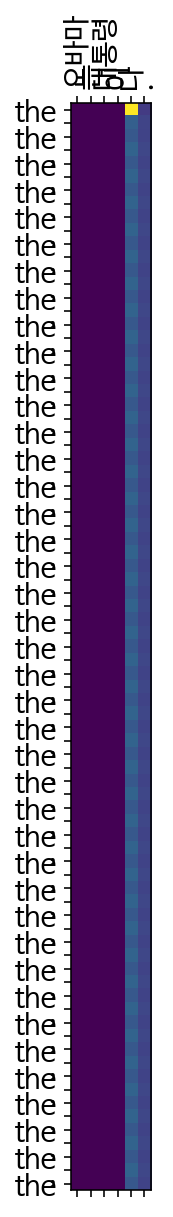

Input: ['ÏãúÎØº', 'Îì§', 'ÏùÄ', 'ÎèÑÏãú', 'ÏÜç', 'Ïóê', 'ÏÇ∞Îã§', '.']
Predicted translation: the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the 


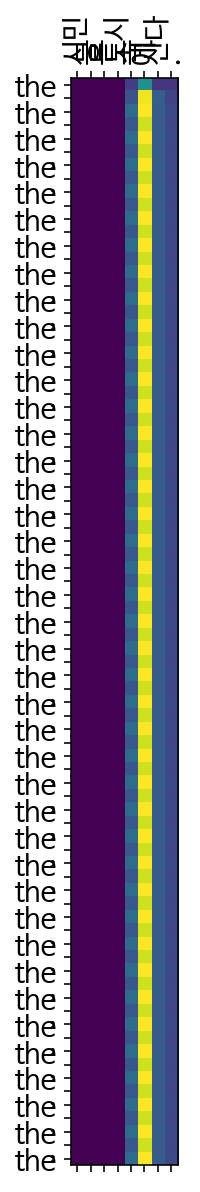

Input: ['Ïª§Ìîº', 'Îäî', 'ÌïÑÏöî', 'ÏóÜ', 'Îã§', '.']
Predicted translation: the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the 


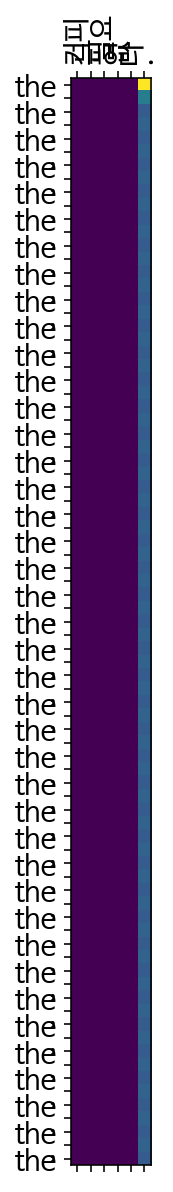

Input: ['ÏùºÍ≥±', 'Î™Ö', 'Ïùò', 'ÏÇ¨ÎßùÏûê', 'Í∞Ä', 'Î∞úÏÉù', 'Ìñà', 'Îã§', '.']
Predicted translation: the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the , the 


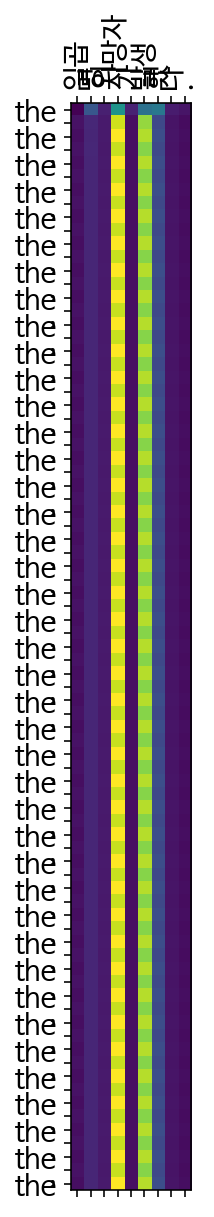

In [94]:
translate("Ïò§Î∞îÎßàÎäî ÎåÄÌÜµÎ†πÏù¥Îã§.", encoder, decoder)
translate("ÏãúÎØºÎì§ÏùÄ ÎèÑÏãú ÏÜçÏóê ÏÇ∞Îã§.", encoder, decoder)
translate("Ïª§ÌîºÎäî ÌïÑÏöî ÏóÜÎã§.", encoder, decoder)
translate("ÏùºÍ≥± Î™ÖÏùò ÏÇ¨ÎßùÏûêÍ∞Ä Î∞úÏÉùÌñàÎã§.", encoder, decoder)

# ÌöåÍ≥†

### - Ïù¥Î≤à ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú **Ïñ¥Î†§Ïõ†Îçò Ï†ê**.
* ÌïôÏäµÏù¥ Ïò¨Î∞îÎ•¥Í≤å ÎêòÏßÄ ÏïäÏïÑÏÑú Ï∂úÎ†•Í≤∞Í≥ºÍ∞Ä Îß§Ïö∞ Ï¢ãÏßÄ ÏïäÎã§.(ÏõêÏù∏ÏùÑ Ï∞æÍ∏∞ ÌûòÎì§Îã§)


### - ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÎ©¥ÏÑú **ÏïåÏïÑÎÇ∏ Ï†ê** ÌòπÏùÄ **ÏïÑÏßÅ Î™®Ìò∏Ìïú Ï†ê**.
> ÏïåÏïÑÎÇ∏Ï†ê
* Mecab ÏÑ§ÏπòÏãú Tagger Ïò§Î•ò Ï≤òÎ¶¨ 
* Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Ïãú Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤ΩÌïòÍ∏∞ Series-> List(str)


> Î™®Ìò∏ÌïúÏ†ê
* attention map Ìï¥ÏÑù



### - Î£®Î∏åÎ¶≠ ÌèâÍ∞Ä ÏßÄÌëúÎ•º ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ **ÏãúÎèÑÌïú Í≤ÉÎì§**.



>#### **Î£®Î∏åÎ¶≠ÌèâÍ∞Ä ÏßÄÌëú**
>|Î≤àÌò∏|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Í∏∞Ï§Ä|
>|:---:|---|---|
>|1|¬†Î≤àÏó≠Í∏∞ Î™®Îç∏ ÌïôÏäµÏóê ÌïÑÏöîÌïú `ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨`Í∞Ä ÌïúÍµ≠Ïñ¥ Ìè¨Ìï®ÌïòÏó¨ Ïûò Ïù¥Î£®Ïñ¥Ï°åÎã§. |`Íµ¨ÎëêÏ†ê, ÎåÄÏÜåÎ¨∏Ïûê, ÎùÑÏñ¥Ïì∞Í∏∞, ÌïúÍ∏Ä ÌòïÌÉúÏÜåÎ∂ÑÏÑù` Îì± Î≤àÏó≠Í∏∞ Î™®Îç∏Ïóê ÏöîÍµ¨ÎêòÎäî Ï†ÑÏ≤òÎ¶¨Í∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎã§.|
>|2|¬†`Attentional Seq2seq Î™®Îç∏`Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Íµ¨ÎèôÎêúÎã§.|¬†seq2seq Î™®Îç∏ ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑú `training lossÍ∞Ä ÏïàÏ†ïÏ†Å`ÏúºÎ°ú Îñ®Ïñ¥ÏßÄÎ©¥ÏÑú ÌïôÏäµÏù¥ ÏßÑÌñâÎê®Ïù¥ ÌôïÏù∏ÎêòÏóàÎã§.|
>|3|ÌÖåÏä§Ìä∏ Í≤∞Í≥º `ÏùòÎØ∏Í∞Ä ÌÜµÌïòÎäî ÏàòÏ§ÄÏùò Î≤àÏó≠Î¨∏`Ïù¥ ÏÉùÏÑ±ÎêòÏóàÎã§.|ÌÖåÏä§Ìä∏Ïö© ÎîîÏΩîÎçî Î™®Îç∏Ïù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÎßåÎì§Ïñ¥Ï†∏ÏÑú, `Ï†ïÎãµÍ≥º Ïñ¥Îäê Ï†ïÎèÑ Ïú†ÏÇ¨Ìïú ÏòÅÏñ¥ Î≤àÏó≠`Ïù¥ ÏßÑÌñâÎê®ÏùÑ ÌôïÏù∏ÌïòÏòÄÎã§.|



### - **ÏûêÍ∏∞ Îã§Ïßê**
* Ïñ¥Î†§Ïö¥ ÏΩîÎìú Îã§Ïãú ÌïúÎ≤à Ïù¥Ìï¥ÌïòÎ©∞ ÏùΩÍ∏∞